### Machine Learning Model and Data Analysis

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import sqlite3
from sklearn.metrics import r2_score



In [73]:
# Define the path for the cleaned CSV file
cleaned_file_path = '/Users/zan/Desktop/Data Analytics Course/Credit-Worthiness-Project-4/Credit Worthiness/Resources/cleaned_credit_risk_dataset.csv'

In [74]:
# Load the cleaned CSV into a DataFrame
credit_worthiness = pd.read_csv(cleaned_file_path)
credit_worthiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  float64
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 2.6+ MB


In [75]:
# Convert loan_status to float (0 is non-default, 1 is default)
credit_worthiness['loan_status'] = credit_worthiness['loan_status'].astype(float)
credit_worthiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  float64
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 2.6+ MB


In [76]:
print(credit_worthiness.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


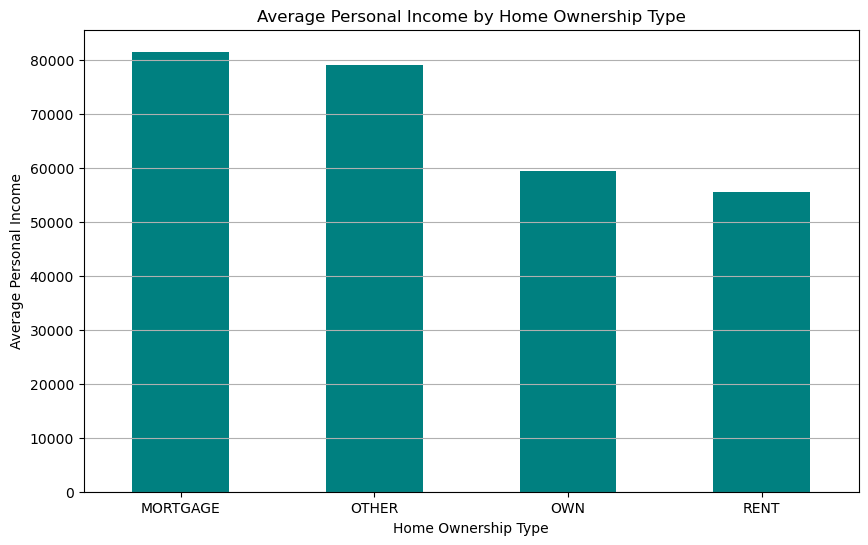

In [77]:
# Create a bar graph comparing average personal income by home ownership type
avg_income_by_home_ownership = credit_worthiness.groupby('person_home_ownership')['person_income'].mean()
plt.figure(figsize=(10, 6))
avg_income_by_home_ownership.plot(kind='bar', color='teal')
plt.title('Average Personal Income by Home Ownership Type')
plt.xlabel('Home Ownership Type')
plt.ylabel('Average Personal Income')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

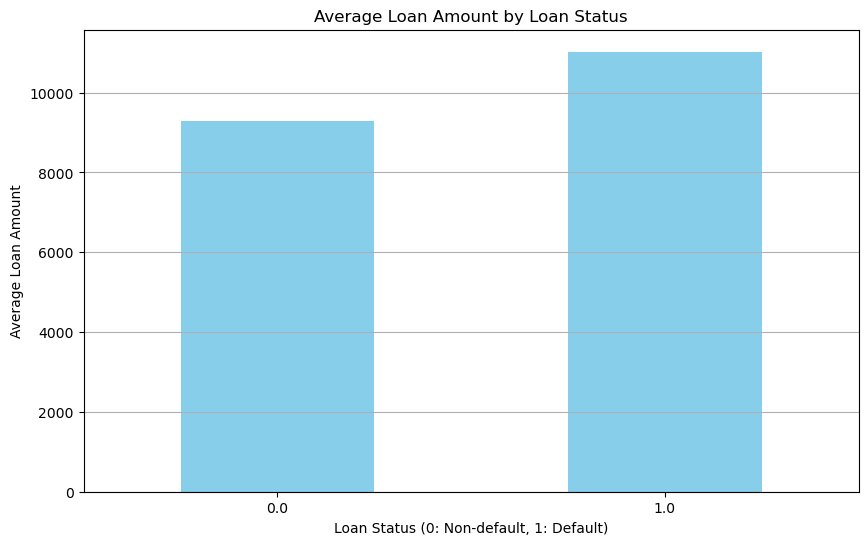

In [78]:
# Create graphs to analyze relationships with loan_status
# 1. Loan amount vs. Loan status
plt.figure(figsize=(10, 6))
credit_worthiness.groupby('loan_status')['loan_amnt'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Loan Amount by Loan Status')
plt.xlabel('Loan Status (0: Non-default, 1: Default)')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<Figure size 1200x600 with 0 Axes>

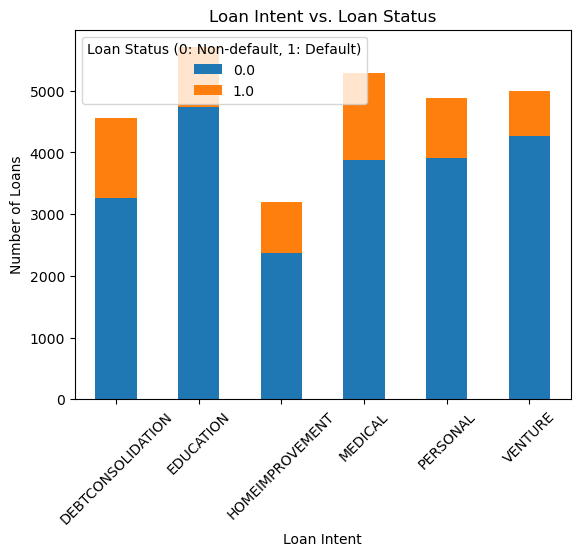

In [79]:
# 2. Loan intent vs. Loan status
plt.figure(figsize=(12, 6))
credit_worthiness.groupby(['loan_intent', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Loan Intent vs. Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status (0: Non-default, 1: Default)')
plt.show()

<Figure size 1000x600 with 0 Axes>

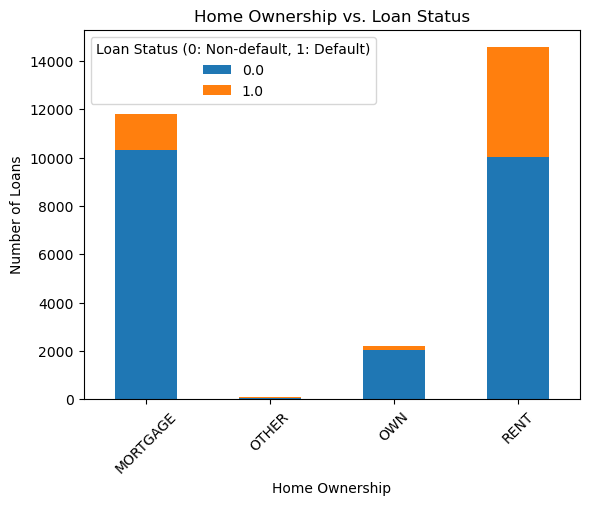

In [80]:
# 3. Home ownership vs. Loan status
plt.figure(figsize=(10, 6))
credit_worthiness.groupby(['person_home_ownership', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Home Ownership vs. Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status (0: Non-default, 1: Default)')
plt.show()


In [81]:
# Feature selection and preprocessing
# Define features and target
X = credit_worthiness.drop(['loan_status'], axis=1)
y = credit_worthiness['loan_status']

In [82]:
# Handle categorical variables using one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = encoder.fit_transform(X[categorical_columns])

In [83]:
# Combine encoded categorical data with numeric data
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
numeric_data = X[numeric_columns].values

X_processed = np.hstack((numeric_data, categorical_data))

In [84]:
# Scale numeric features
scaler = StandardScaler()
X_processed = scaler.fit_transform(X_processed)

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [86]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[4242  201]
 [ 583  702]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      4443
         1.0       0.78      0.55      0.64      1285

    accuracy                           0.86      5728
   macro avg       0.83      0.75      0.78      5728
weighted avg       0.86      0.86      0.85      5728



In [88]:

# y_test: True values
# y_pred: Predicted values from the model
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


R-squared: 0.2134259198441827
